<a href="https://colab.research.google.com/github/learnvisionAI/ObjectDetection_YOLO/blob/main/Session1_YOLOV8_Inference/YOLOv8_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**YOLOv8 is trained for Object Detection and Image Segmentation and Image Classification Tasks. We will run Object Detection and Image Segementation tasks in this Tutorial**

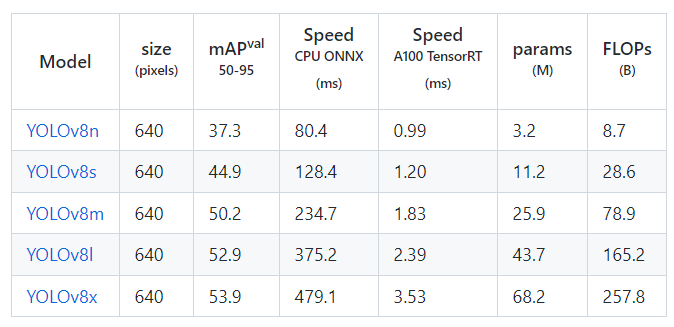

#Before Running The Script, Please Make Sure, You Have Selected the Run Time as GPU

#**Import the Required Library**

In [1]:
from IPython.display import Image

#**Install Ultralytics Library**

In [2]:
!pip install ultralytics==8.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.1 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=a32c5884e7d5083983546a4f1b2eddc8792440bf88e3b6d5d1d7cb2f89aa1643
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


#**Check Whether the GPU is Available or Not**

In [3]:
import torch

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.__version__

'2.1.0+cu121'

#**Download Sample Image and Video From the Google Drive into the Google Colab Notebook**

In [22]:
!gdown 'https://drive.google.com/uc?id=18ZfrEaZ52sVJ5HgSaCLlOAN4gFnjwv6r&confirm=t'

Downloading...
From: https://drive.google.com/uc?id=18ZfrEaZ52sVJ5HgSaCLlOAN4gFnjwv6r&confirm=t
To: /content/image1.jpg
100% 214k/214k [00:00<00:00, 89.0MB/s]


#**Object Detection**

#**Run Object Detection on a Sample Image**

In [9]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/image1.jpg'

2024-01-05 14:14:21.571635: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 14:14:21.571696: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 14:14:21.573060: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 14:14:22.602437: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s summary: 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/i

#**Display the Output Image**

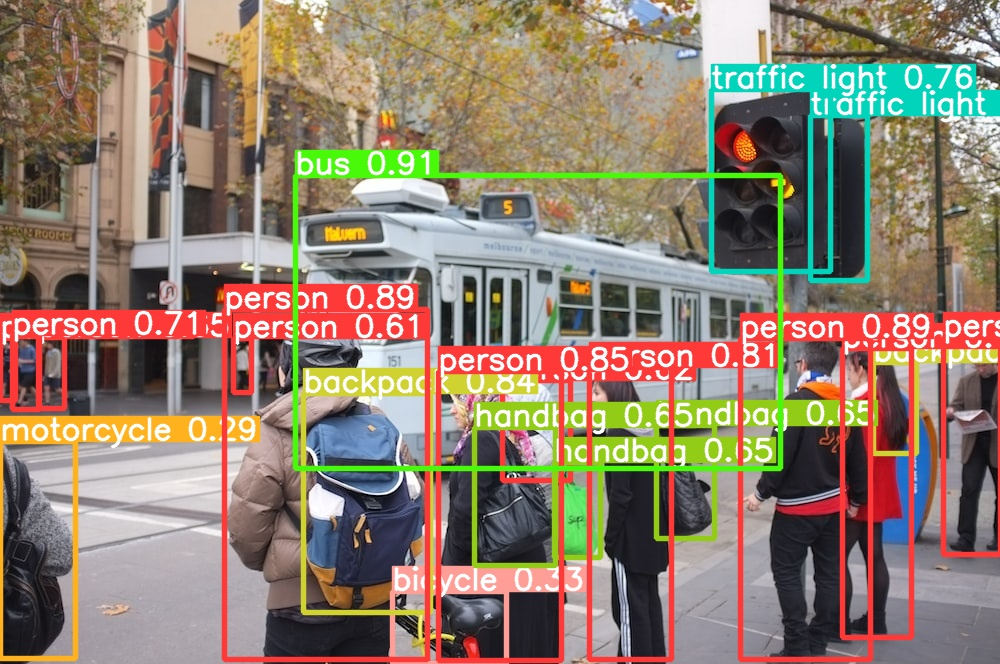

In [11]:
Image('/content/runs/detect/predict2/image1.jpg')

#**To save the Bounding Box Information set save_txt=True**

In [42]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/image2.jpg' save_txt=True

2024-01-05 14:48:44.356630: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 14:48:44.356700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 14:48:44.358021: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 14:48:45.408663: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s summary: 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/i

#**Display the Output Image**

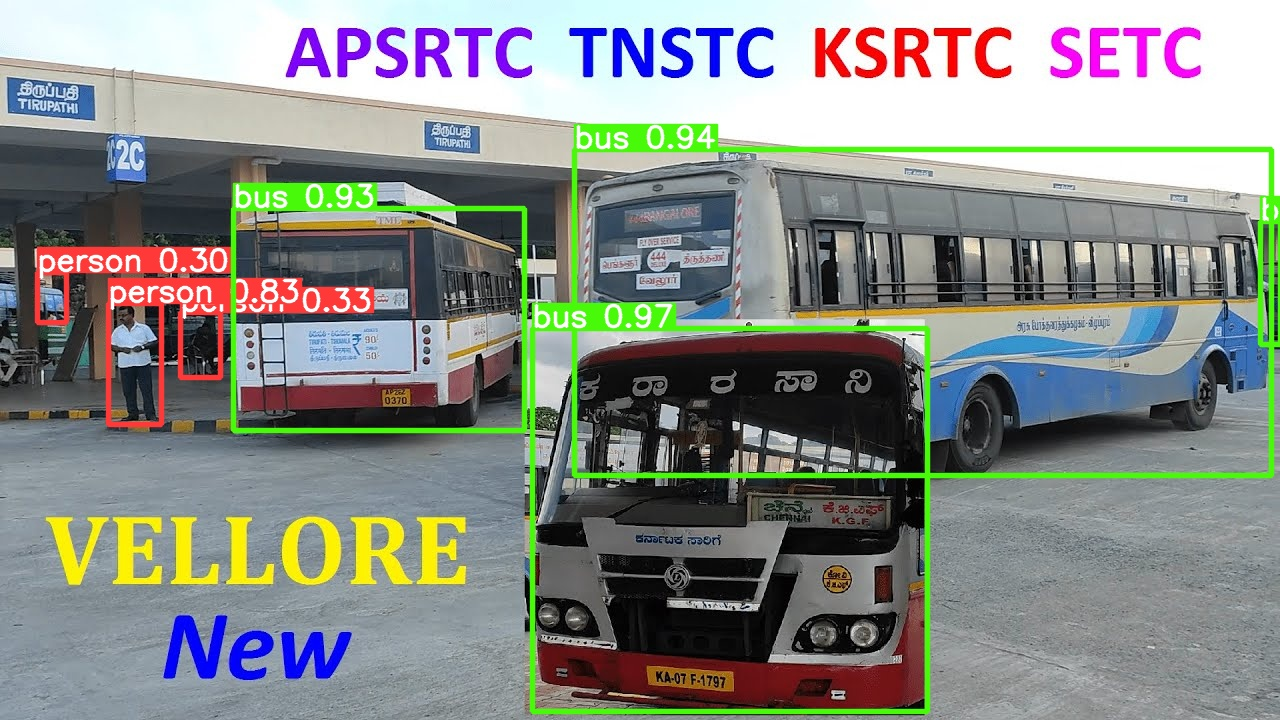

In [43]:
Image('/content/runs/detect/predict13/image2.jpg')

# To display objects only with high confidence score

In [47]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/image2.jpg' save_txt=True conf=0.9

2024-01-05 14:49:46.726338: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 14:49:46.726389: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 14:49:46.727711: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 14:49:47.988909: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s summary: 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
image 1/1 /content/image2.jpg: 384x640 3 buss, 77.8ms
Speed: 0

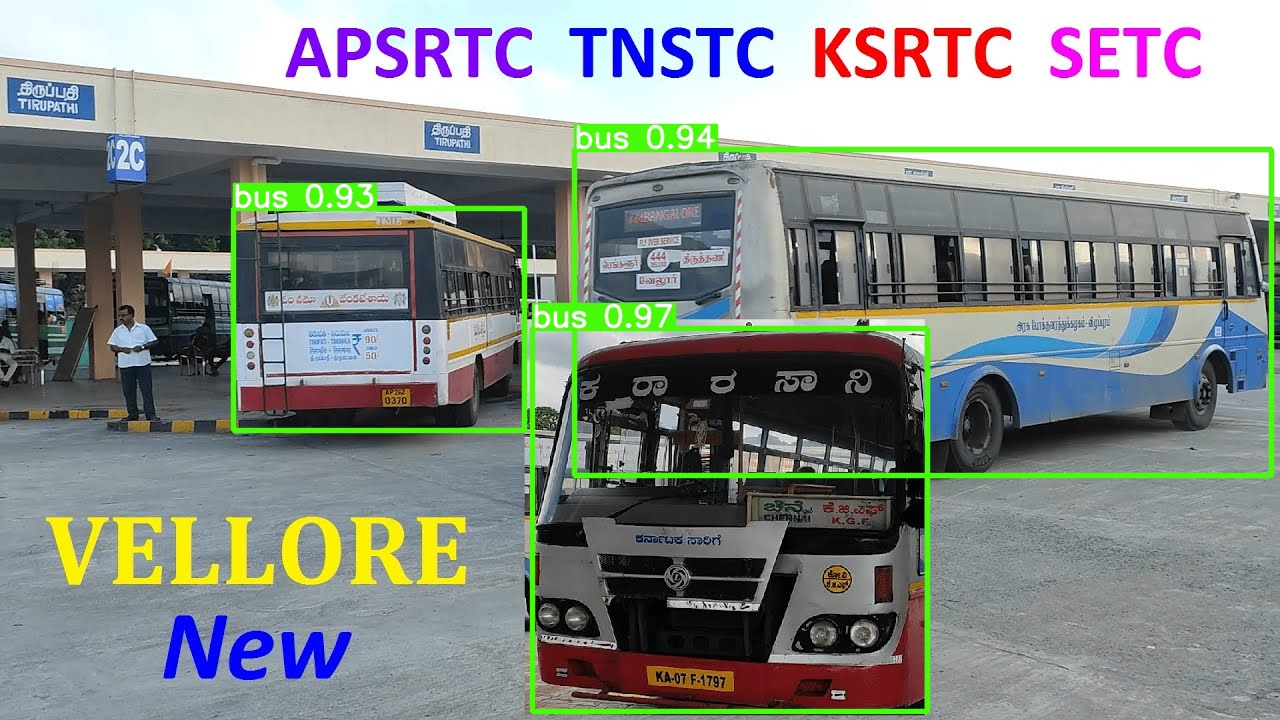

In [48]:
Image('/content/runs/detect/predict15/image2.jpg')

#**To save the "Crop Object"  set save_crop=True**

In [49]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/image2.jpg' save_crop=True conf=0.95

2024-01-05 14:50:50.649352: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 14:50:50.649400: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 14:50:50.650714: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 14:50:51.664510: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s summary: 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
image 1/1 /content/image2.jpg: 384x640 1 bus, 66.9ms
Speed: 0.

#**Display the Output Image**

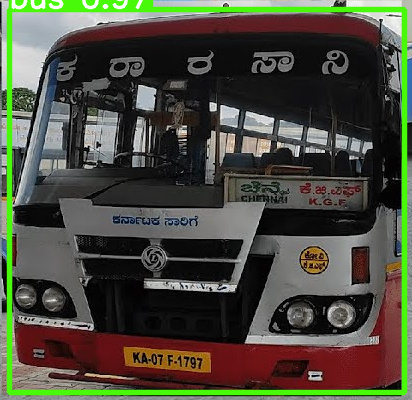

In [51]:
Image('/content/runs/detect/predict16/crops/bus/image2.jpg')

#**To remove the confidence values and labels, we will use hide_labels and hide_conf Flags**

In [52]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/image2.jpg' hide_labels=True hide_conf=True

2024-01-05 14:51:55.950875: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 14:51:55.950925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 14:51:55.952176: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 14:51:56.976285: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s summary: 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/i

#**Display the Output Image**

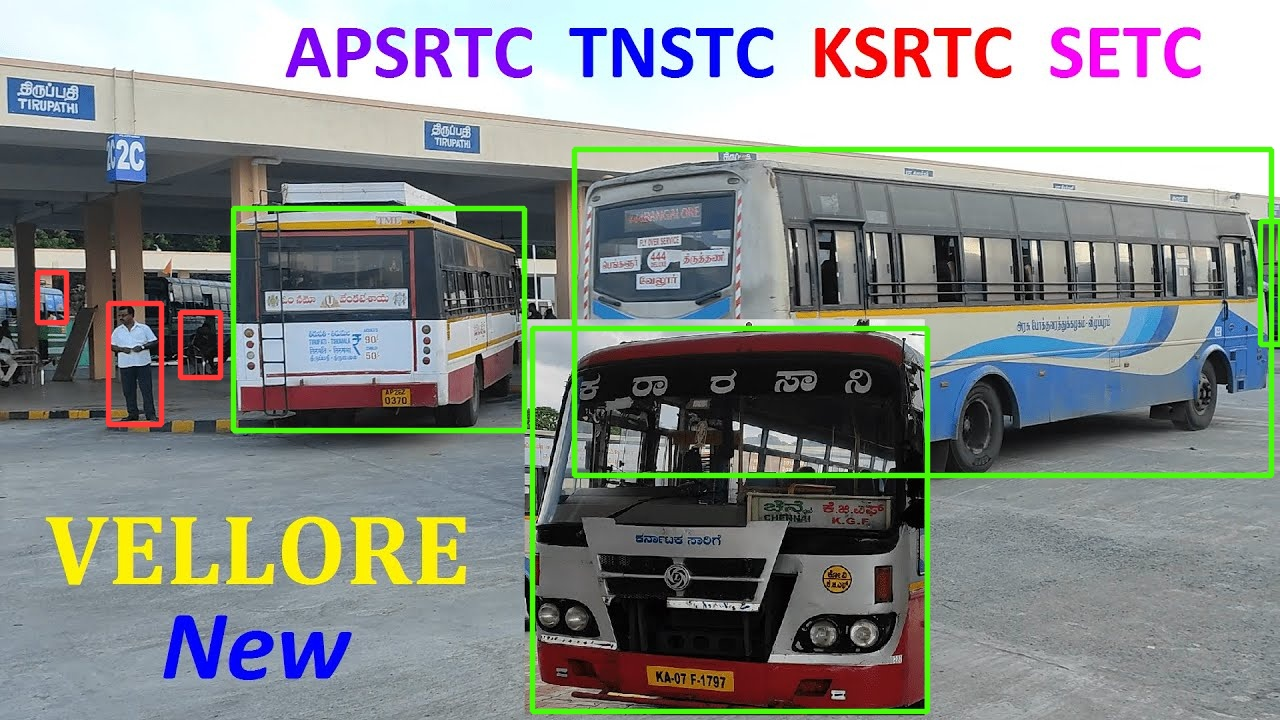

In [25]:
Image('/content/runs/detect/predict6/image2.jpg')

#**Run Object Detection on Videos**

In [53]:
!gdown 'https://drive.google.com/uc?id=18ZL9J13J5kfUaoLUH3ccK4zvUBI9mMA9&confirm=t'

Downloading...
From: https://drive.google.com/uc?id=18ZL9J13J5kfUaoLUH3ccK4zvUBI9mMA9&confirm=t
To: /content/demo.mp4
100% 11.5M/11.5M [00:00<00:00, 160MB/s]


In [54]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/demo.mp4'

2024-01-05 14:53:11.331302: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 14:53:11.331358: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 14:53:11.333230: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 14:53:12.709591: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s summary: 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
video 1/1 (1/1314) /content/demo.mp4: 384x640 3 cars, 71.2ms
v

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict5/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Image Segmentation**

In [58]:
!yolo task=segment mode=predict model=yolov8s-seg.pt source='/content/image1.jpg' hide_labels=True

2024-01-05 15:01:58.096975: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 15:01:58.097030: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 15:01:58.098962: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 15:01:59.534429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs
image 1/1 /content/image1.jpg: 448x640 12 persons, 1 bus, 

#**Dispay the Output Image**

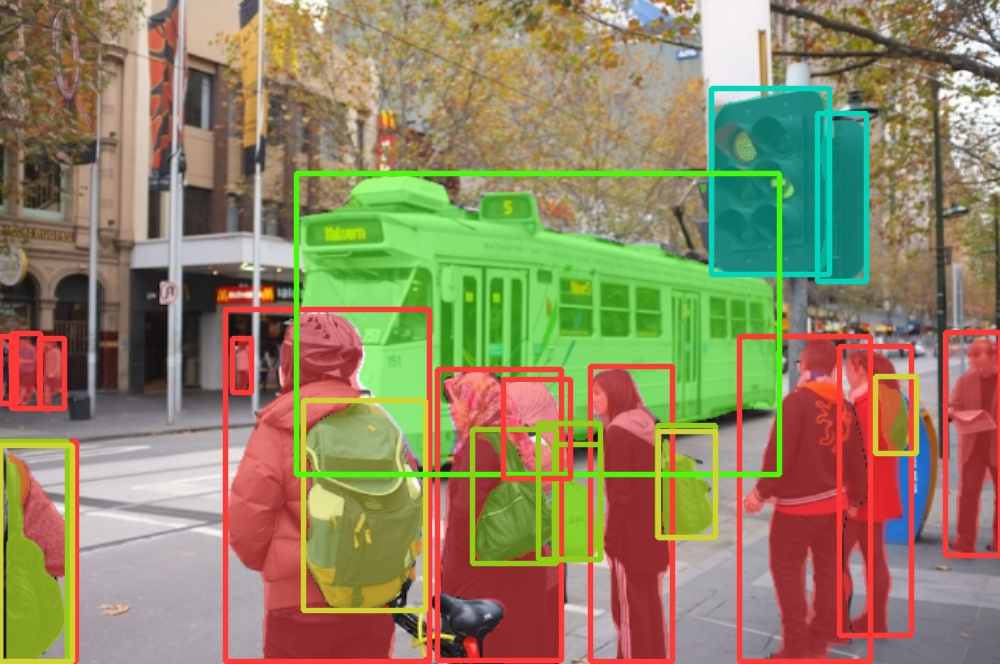

In [59]:
Image('/content/runs/segment/predict2/image1.jpg')

#**Hide Labels and Confidence Value**

In [ ]:
!yolo task=segment mode=predict model=yolov8s-seg.pt source='/content/image1.jpg'  hide_labels=True hide_conf=True

Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs
image 1/1 /content/image1.jpg: 448x640 12 persons, 1 bus, 2 traffic lights, 4 backpacks, 5 handbags, 19.3ms
Speed: 0.4ms pre-process, 19.3ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


#**Display the Output Image**

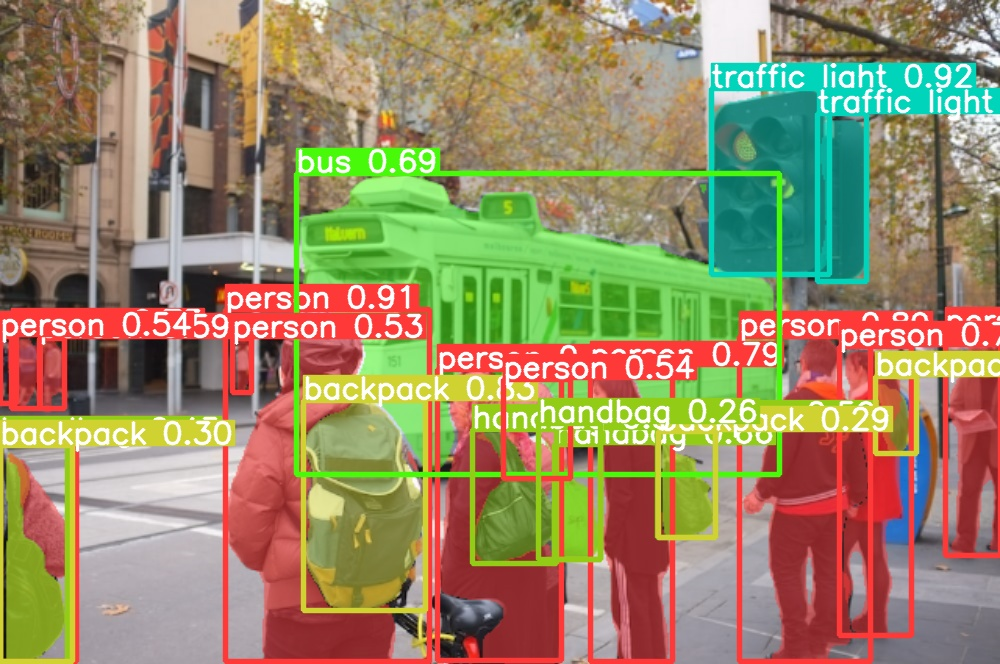

In [57]:
Image('/content/runs/segment/predict/image1.jpg')

#**Run Segmentation on Video**

In [60]:
!gdown 'https://drive.google.com/uc?id=18jukezIRvPtESS3AWiwbtqsKlXtZFJkq&confirm=t'

Downloading...
From: https://drive.google.com/uc?id=18jukezIRvPtESS3AWiwbtqsKlXtZFJkq&confirm=t
To: /content/cars.mp4
100% 9.51M/9.51M [00:00<00:00, 23.0MB/s]


In [61]:
!yolo task=segment mode=predict model=yolov8s-seg.pt source='/content/cars.mp4'

2024-01-05 15:09:55.538200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 15:09:55.538250: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 15:09:55.539582: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 15:09:56.719378: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs
video 1/1 (1/368) /content/cars.mp4: 384x640 13 cars, 1 tr

#**Display the Output Video for Segmentation**

In [ ]:
!rm  "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict3/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Export Model in ONNX Format**

#**Detection**

In [ ]:
!yolo task=detect mode=export model=yolov8s.pt format=onnx

Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
Fusing layers... 
YOLOv8s summary: 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

PyTorch: starting from yolov8s.pt with output shape (1, 84, 8400) (21.5 MB)
requirements: YOLOv5 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled p

#**Segmentation**

In [ ]:
!yolo task=segment mode=export model=yolov8s-seg.pt format=onnx

Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

PyTorch: starting from yolov8s-seg.pt with output shape (1, 116, 8400) (22.8 MB)

ONNX: starting export with onnx 1.13.1...
ONNX: export success ✅ 1.5s, saved as yolov8s-seg.onnx (45.3 MB)

Export complete (2.8s)
Results saved to /content
Predict:         yolo task=segment mode=predict model=yolov8s-seg.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=segment mode=val model=yolov8s-seg.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Visualize:       https://netron.app


#**To Do All this in Python Instead of Command Line**

#**For Image**

In [ ]:
from ultralytics import YOLO

In [ ]:
#Initialize YOLO with the model name
model = YOLO("yolov8m.pt")
#Predict Method Takes all the parameters of the Command Line Interface
model.predict(source='/content/image1.jpg',  save=True, conf=0.5,save_txt=True)

  0%|          | 0.00/49.7M [00:00<?, ?B/s]


Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8m summary: 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs
image 1/1 /content/image1.jpg: 448x640 11 persons, 1 bicycle, 1 bus, 1 traffic light, 1 backpack, 3 handbags, 97.7ms
Speed: 0.5ms pre-process, 97.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6
1 labels saved to runs/detect/predict6/labels


[tensor([[2.24000e+02, 3.09000e+02, 4.34000e+02, 6.59000e+02, 9.11621e-01, 0.00000e+00],
         [9.44000e+02, 3.37000e+02, 1.00000e+03, 5.55000e+02, 9.02344e-01, 0.00000e+00],
         [7.38000e+02, 3.37000e+02, 8.70000e+02, 6.61000e+02, 8.90625e-01, 0.00000e+00],
         [2.96000e+02, 1.75000e+02, 7.79000e+02, 4.67000e+02, 8.90137e-01, 5.00000e+00],
         [5.89000e+02, 3.67000e+02, 6.72000e+02, 6.61000e+02, 8.75977e-01, 0.00000e+00],
         [4.38000e+02, 3.71000e+02, 5.58000e+02, 6.59000e+02, 8.56934e-01, 0.00000e+00],
         [3.02000e+02, 4.02000e+02, 4.32000e+02, 6.12000e+02, 8.32031e-01, 2.40000e+01],
         [8.36000e+02, 3.48000e+02, 9.09000e+02, 6.39000e+02, 7.88086e-01, 0.00000e+00],
         [6.97000e+02, 8.70000e+01, 8.29000e+02, 2.73000e+02, 7.73438e-01, 9.00000e+00],
         [4.74000e+02, 4.27000e+02, 5.54000e+02, 5.65000e+02, 7.37305e-01, 2.60000e+01],
         [6.58000e+02, 4.32000e+02, 7.14000e+02, 5.38000e+02, 7.12402e-01, 2.60000e+01],
         [8.00000e+00

#**Display the Output Image**

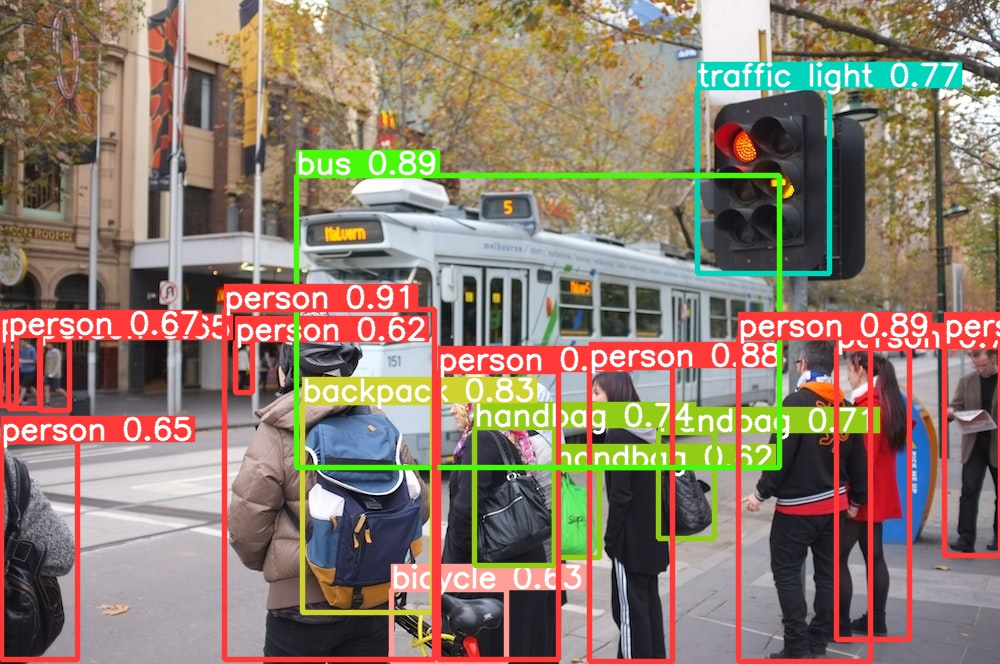

In [ ]:
Image('/content/runs/detect/predict6/image1.jpg')

#**For Video**

In [ ]:
#Initialize YOLO with the model name
model = YOLO("yolov8m.pt")
#Predict Method Takes all the parameters of the Command Line Interface
model.predict(source='/content/demo.mp4',  save=True, conf=0.5, save_txt = False)

Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8m summary: 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs
video 1/1 (1/1314) /content/demo.mp4: 384x640 2 cars, 1 truck, 48.2ms
video 1/1 (2/1314) /content/demo.mp4: 384x640 2 cars, 1 truck, 25.8ms
video 1/1 (3/1314) /content/demo.mp4: 384x640 2 cars, 1 truck, 24.5ms
video 1/1 (4/1314) /content/demo.mp4: 384x640 3 cars, 1 truck, 31.9ms
video 1/1 (5/1314) /content/demo.mp4: 384x640 2 cars, 1 truck, 27.7ms
video 1/1 (6/1314) /content/demo.mp4: 384x640 1 car, 1 truck, 27.3ms
video 1/1 (7/1314) /content/demo.mp4: 384x640 1 car, 1 truck, 24.5ms
video 1/1 (8/1314) /content/demo.mp4: 384x640 2 cars, 1 truck, 28.3ms
video 1/1 (9/1314) /content/demo.mp4: 384x640 1 car, 1 truck, 26.7ms
video 1/1 (10/1314) /content/demo.mp4: 384x640 1 car, 1 truck, 36.4ms
video 1/1 (11/1314) /content/demo.mp4: 384x640 1 car, 1 truck, 32.2ms
video 1/1 (12/1314) /content/demo.mp4: 384x640 1 car, 

[tensor([[8.34000e+02, 2.60000e+02, 8.76000e+02, 3.22000e+02, 6.60156e-01, 7.00000e+00],
         [5.69000e+02, 2.86000e+02, 5.93000e+02, 3.18000e+02, 5.65918e-01, 2.00000e+00],
         [7.12000e+02, 2.75000e+02, 7.30000e+02, 2.94000e+02, 5.33203e-01, 2.00000e+00]], device='cuda:0'),
 tensor([[8.34000e+02, 2.60000e+02, 8.76000e+02, 3.22000e+02, 6.29883e-01, 7.00000e+00],
         [5.69000e+02, 2.89000e+02, 5.91000e+02, 3.18000e+02, 5.90820e-01, 2.00000e+00],
         [7.10000e+02, 2.75000e+02, 7.30000e+02, 2.94000e+02, 5.27344e-01, 2.00000e+00]], device='cuda:0'),
 tensor([[8.34000e+02, 2.60000e+02, 8.76000e+02, 3.22000e+02, 6.18652e-01, 7.00000e+00],
         [5.68000e+02, 2.87000e+02, 5.90000e+02, 3.18000e+02, 5.29297e-01, 2.00000e+00],
         [7.08000e+02, 2.75000e+02, 7.30000e+02, 2.93000e+02, 5.27344e-01, 2.00000e+00]], device='cuda:0'),
 tensor([[1.05500e+03, 6.80000e+02, 1.23700e+03, 7.20000e+02, 6.97754e-01, 2.00000e+00],
         [8.34000e+02, 2.60000e+02, 8.76000e+02, 3.22

#**Display the Output Video**

In [ ]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict7/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**To Export the Model in the onnx Format comment model.predict line and add the model.export()**

In [ ]:
#Initialize YOLO with the model name
model = YOLO("yolov8m.pt")
#Export the Model in the onnx format
model.export(format="onnx")

Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
half=True only compatible with GPU or CoreML export, i.e. use device=0 or format=coreml
Fusing layers... 
YOLOv8m summary: 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

PyTorch: starting from yolov8m.pt with output shape (1, 84, 8400) (49.7 MB)
requirements: YOLOv5 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.13.1...
ONNX: export success ✅ 6.7s, saved as yolov8m.onnx (99.0 MB)

Export complete (10.4s)
Results saved to /content
Predict:         yolo task=detect mode=predict model=yolov8m.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=detect mode=val model=yolov8m.onnx -WARNING ⚠️ not yet suppo